# Import data and libraries  

In [4]:
import pandas as pd
import numpy as np

In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.sample(6)

,Survived,Age,Fare
735,0,28.5,16.1000
557,0,NaN,227.5250
178,0,30.0,13.0000
620,0,27.0,14.4542
593,0,NaN,7.7500
501,0,21.0,7.7500


In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(714, 3)

# Train Test split

In [14]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


# Apply model

In [17]:
clf = DecisionTreeClassifier()

In [18]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred = clf.predict(X_test)

In [21]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [22]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6330594679186228)

# Binning

In [23]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [42]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

trf

ColumnTransformer(transformers=[('first',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [0]),
                                ('second',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [1])])

In [25]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [26]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [27]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [28]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [29]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())



In [30]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
438,64.0,14.0,263.0000,14.0,"(54.0, 80.0]","(108.9, 512.329]"
319,40.0,11.0,134.5000,14.0,"(38.0, 42.0]","(108.9, 512.329]"
122,32.5,9.0,30.0708,10.0,"(32.0, 35.0]","(26.55, 31.275]"
192,19.0,3.0,7.8542,2.0,"(16.0, 19.0]","(7.775, 7.896]"
355,28.0,7.0,9.5000,4.0,"(25.0, 28.0]","(8.158, 10.5]"


In [44]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)


DecisionTreeClassifier()

In [46]:
y_pred2 = clf.predict(X_test_trf)
y_pred2

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [32]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [33]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6317292644757433)

In [48]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print("Accuracy is :",np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')), "\n")
    
    plt.figure(figsize=(14,4))
    
    # Age
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    # Fare
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before ")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

Accuracy is : 0.634546165884194 



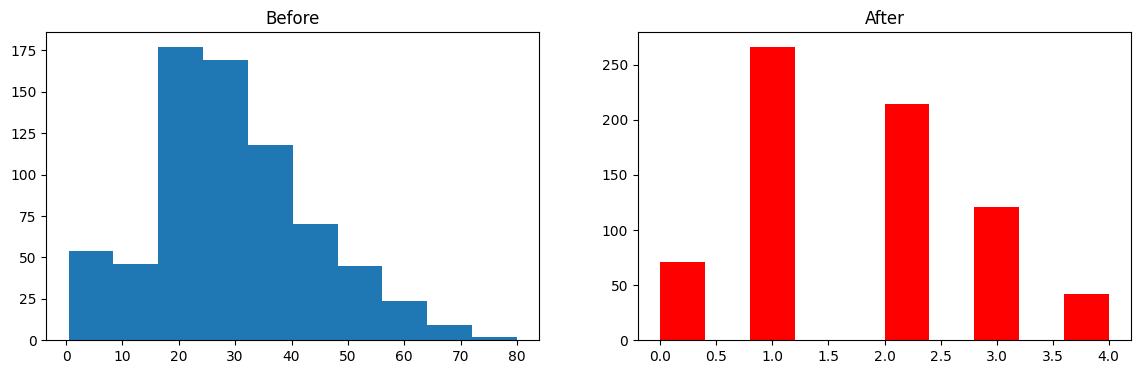

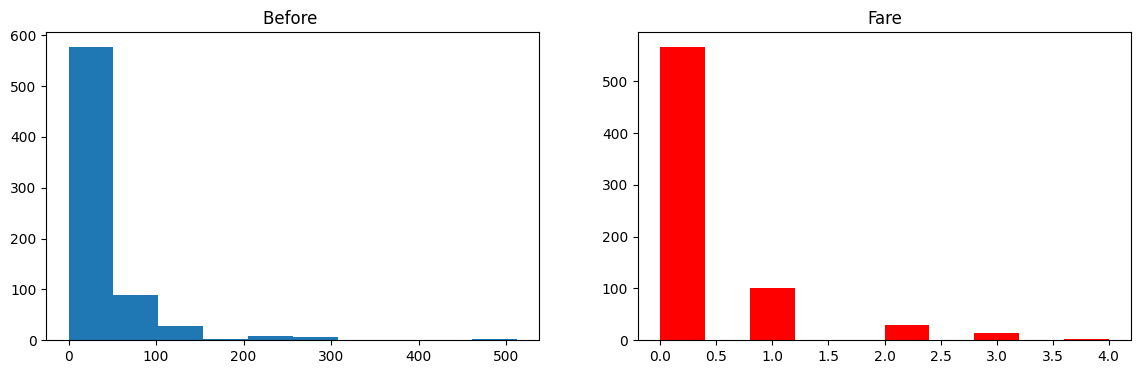

In [51]:
discretize(5,'kmeans')